## Posttest

Import the data:

In [2]:
import pandas as pd

df = pd.read_csv("logs.csv")

df # Looks like user search data

,date,user,page,duration
0,2021-01-01,17789,about,9
1,2021-01-01,17789,search,27
2,2021-01-01,17789,search,9
3,2021-01-01,17789,about,41
4,2021-01-01,17789,search,12
...,...,...,...,...
26963,2021-03-01,20762,search,25
26964,2021-03-01,20762,profile,27
26965,2021-03-01,20762,listings,66
26966,2021-03-01,20762,about,18


In [5]:
df.groupby('user').sum().describe() # Interesting info about the # of users and how long they spent

,duration
count,2974.000000
mean,380.189307
std,153.143822
min,9.000000
25%,285.000000
50%,388.000000
75%,484.000000
max,896.000000


In [10]:
df.groupby('page').sum()['duration'] # look at where people spend the most time

page
about       116438
home        113527
listings    336736
profile     169051
search      394931
Name: duration, dtype: int64

<AxesSubplot:xlabel='date', ylabel='duration'>

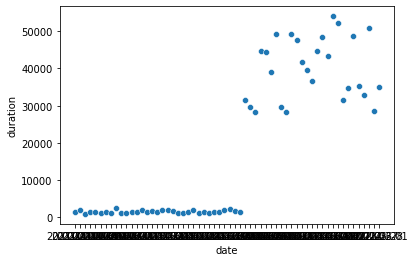

In [24]:
# could be funny/interesting:
import seaborn as sb

df_gd = df.groupby('date').sum()

sb.scatterplot(x='date',y='duration',data=df_gd)

In [17]:
# Seem like the website usage really picks up at a certian time....
# Specifically feburary 3rd

,user,duration
date,,
2021-01-01,1387936,1517
2021-01-02,1834288,2026
2021-01-03,908828,938
2021-01-04,1462032,1494
2021-01-05,1088226,1332
2021-01-06,945904,1184
2021-01-07,1482230,1386
2021-01-08,1286599,1290
2021-01-09,2217501,2453


In [18]:
df_gu = df.groupby('user').sum()

<AxesSubplot:xlabel='user', ylabel='duration'>

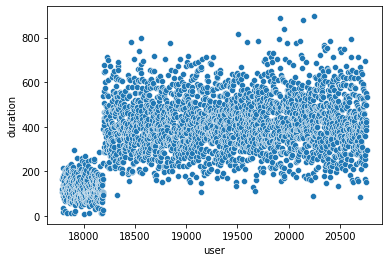

In [19]:
sb.scatterplot(x='user',y='duration',data=df_gu) 

There appears to be a subset of earlier users who used the serice a lot less than latter ones.

<AxesSubplot:xlabel='date', ylabel='user'>

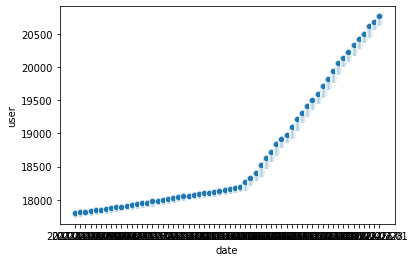

In [22]:
sb.scatterplot(x='date',y='user',data=df) # not sure if thsi makes sense, but few users used each day?

<AxesSubplot:xlabel='user', ylabel='date'>

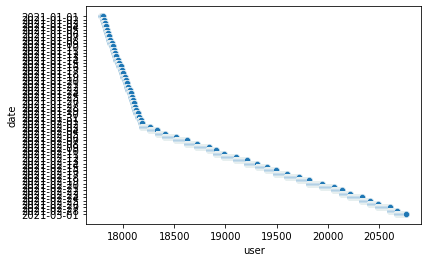

In [23]:
sb.scatterplot(x='user',y='date',data=df) # Seems to be steps, maybe groups of the same number

#shift here correlates with the shift in the duration over time...

Shift in this plot is similar to that in the duration over user plot...

In [29]:
df_gpd = df.groupby(['page','date']).sum()['duration'] # look at where people spend the most time
df_gpd = df_gpd.reset_index()

<AxesSubplot:xlabel='date', ylabel='duration'>

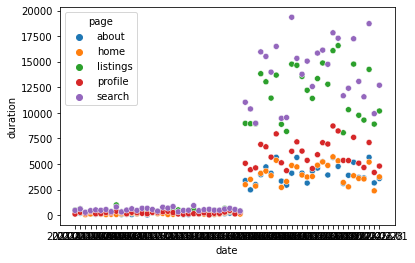

In [31]:
sb.scatterplot(x='date',y='duration',hue='page', data=df_gpd)

Does not look like the jump in popularity was due to a change in any specific offering, but the jump caused a stratification in duration.